<a href="https://colab.research.google.com/github/Sindhuhar/deep_learning/blob/main/save_keras_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install the necessary packages

In [1]:
!pip install tensorflow==2.4.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.15.0rc0, 2.15.0rc1)
ERROR: No matching distribution found for tensorflow==2.4.0


### Import Packages

In [3]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from pyimagesearch.preprocessing import ImageToArrayPreprocessor
from pyimagesearch.preprocessing import SimplePreprocessor
from pyimagesearch.datasets import SimpleDatasetLoader
from pyimagesearch.nn.conv import ShallowNet
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

### Serializing a Model to Disk

In [4]:
# construct the argument parse and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-d", "--dataset", required=True,
#	help="path to input dataset")
#ap.add_argument("-m", "--model", required=True,
#	help="path to output model")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"dataset": "animals",
    "model": "shallownet_weights.hdf5"
}

In [5]:
# grab the list of images that we'll be describing
print("[INFO] loading images...")
imagePaths = list(paths.list_images(args["dataset"]))

# initialize the image preprocessors
sp = SimplePreprocessor(32, 32)
iap = ImageToArrayPreprocessor()

# load the dataset from disk then scale the raw pixel intensities
# to the range [0, 1]
sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.astype("float") / 255.0

[INFO] loading images...
[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


In [6]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.25, random_state=42)

# convert the labels from integers to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

In [7]:
# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.005)
model = ShallowNet.build(width=32, height=32, depth=3, classes=3)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	batch_size=32, epochs=100, verbose=1)

[INFO] compiling model...


[INFO] training network...
Epoch 1/100
71/71 [==============================] - 3s 31ms/step - loss: 1.0235 - accuracy: 0.4671 - val_loss: 0.9644 - val_accuracy: 0.5080
Epoch 2/100
71/71 [==============================] - 2s 26ms/step - loss: 0.8950 - accuracy: 0.5547 - val_loss: 0.8990 - val_accuracy: 0.5267
Epoch 3/100
71/71 [==============================] - 2s 27ms/step - loss: 0.8559 - accuracy: 0.5867 - val_loss: 0.8592 - val_accuracy: 0.5600
Epoch 4/100
71/71 [==============================] - 3s 39ms/step - loss: 0.8438 - accuracy: 0.5800 - val_loss: 1.0039 - val_accuracy: 0.5000
Epoch 5/100
71/71 [==============================] - 3s 46ms/step - loss: 0.8204 - accuracy: 0.6036 - val_loss: 0.8474 - val_accuracy: 0.5627
Epoch 6/100
71/71 [==============================] - 3s 37ms/step - loss: 0.8044 - accuracy: 0.6058 - val_loss: 0.8702 - val_accuracy: 0.5467
Epoch 7/100
71/71 [==============================] - 2s 26ms/step - loss: 0.7907 - accuracy: 0.6138 - val_loss: 0.9602 - 

In [8]:
# save the network to disk
print("[INFO] serializing network...")
model.save(args["model"])

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=["cat", "dog", "panda"]))

[INFO] serializing network...
[INFO] evaluating network...
24/24 [==============================] - 1s 17ms/step
              precision    recall  f1-score   support

         cat       0.65      0.58      0.61       262
         dog       0.58      0.55      0.56       249
       panda       0.75      0.88      0.81       239

    accuracy                           0.67       750
   macro avg       0.66      0.67      0.66       750
weighted avg       0.66      0.67      0.66       750



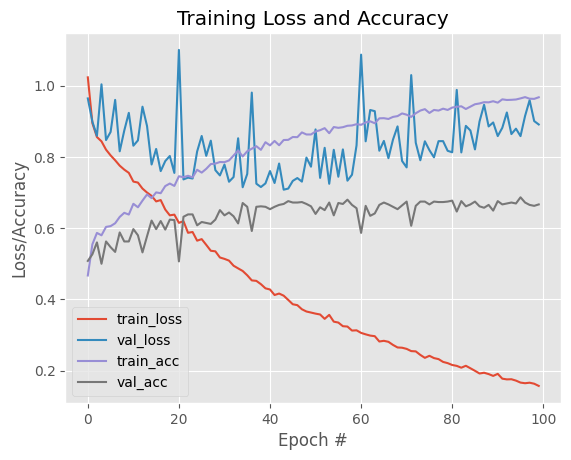

In [9]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()